In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_original= pd.read_csv(r'tested.csv')

In [3]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_original.shape

(418, 12)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:>

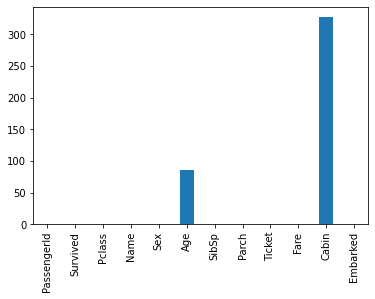

In [6]:
df_original.isna().sum().plot(kind='bar')

In [7]:
#to check for duplicates in the dataset
df_original[df_original.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df_original[df_original.duplicated(subset=['PassengerId','Name'],keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
#to check the number of passengers who have survived the disaster
df_original['Survived'].sum()

152

<AxesSubplot:xlabel='Survived', ylabel='count'>

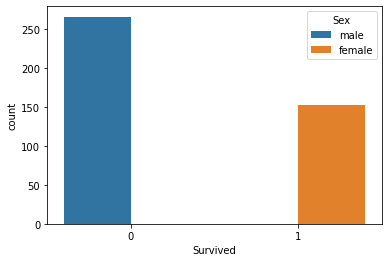

In [10]:
sns.countplot(x='Survived',data = df_original,hue ='Sex')

From the observation above, it seems that none of the men on board had survived. 

In [11]:
#Embarked destinations
survivors_cabin = df_original['Embarked'].value_counts().sort_values()
survivors_cabin


Q     46
C    102
S    270
Name: Embarked, dtype: int64

In [12]:
#Oldest passenger to have survived
df_original[df_original['Survived']==1].Age.max()

76.0

In [13]:
#Youngest passenger to have survived
df_original[df_original['Survived']==1].Age.min()

0.17

In [14]:
#Embarked mapping
emb_dest= {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
df_original['Embarked']= df_original['Embarked'].map(emb_dest)

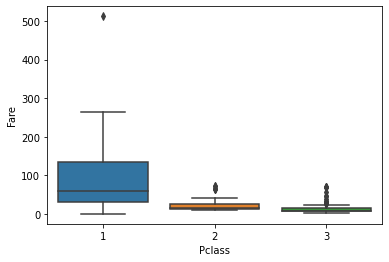

In [15]:
#Fare in comparison with the Pclass
sns.boxplot(x='Pclass',y='Fare',data = df_original)
plt.show()

In [16]:
df_original['Age'].max()

76.0

In [17]:

#Grouping ages
groups = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
df_original['Age_group'] = pd.cut(df_original.Age, range(0, 81, 10), right = False, labels = groups)

In [18]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,30-39
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,40-49
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,60-69
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,20-29
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,20-29


<AxesSubplot:xlabel='Age_group', ylabel='count'>

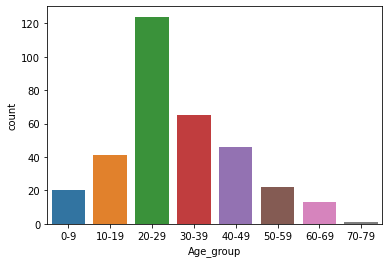

In [19]:
#Number of passengers in each age group
sns.countplot(x = 'Age_group', data = df_original)

<AxesSubplot:xlabel='Age_group', ylabel='count'>

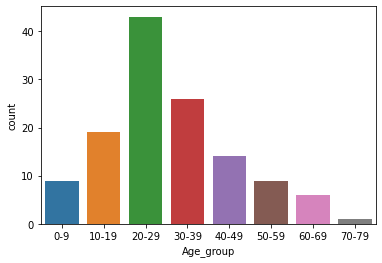

In [20]:
#Number of surviving passengers in each age group
sns.countplot(x=df_original[df_original['Survived']==1]['Age_group'])

<AxesSubplot:xlabel='Age_group', ylabel='Fare'>

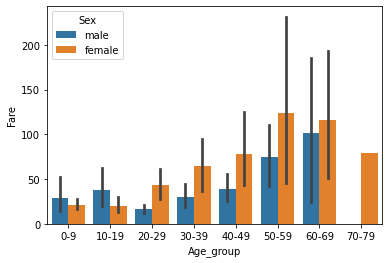

In [21]:
#Comparison for fares with respect to age groups and sex
sns.barplot(x = 'Age_group',y='Fare',data=df_original,hue='Sex')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

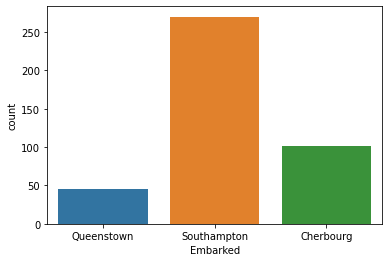

In [22]:
#Number of passengers from the embarked destinations
sns.countplot(x='Embarked',data=df_original)

In [23]:
survived = {0:'No',1:'Yes'}
df_original['survived']= df_original['Survived'].map(survived)
#Pclass mapp
room_class = {1:'Upper class',2:'Middle class',3:'Lower class'}
df_original['Pclass']=df_original['Pclass'].map(room_class)

In [24]:
#Number of family members 
df_original['Family']=df_original['SibSp']+df_original['Parch']

In [25]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,survived,Family
0,892,0,Lower class,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,30-39,No,0
1,893,1,Lower class,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,40-49,Yes,1
2,894,0,Middle class,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,60-69,No,0
3,895,0,Lower class,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,20-29,No,0
4,896,1,Lower class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,20-29,Yes,2


In [26]:
df_original.drop(df_original[['SibSp','Parch']],axis=1,inplace=True)

In [27]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Age_group,survived,Family
0,892,0,Lower class,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Queenstown,30-39,No,0
1,893,1,Lower class,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,Southampton,40-49,Yes,1
2,894,0,Middle class,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Queenstown,60-69,No,0
3,895,0,Lower class,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,Southampton,20-29,No,0
4,896,1,Lower class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,Southampton,20-29,Yes,2


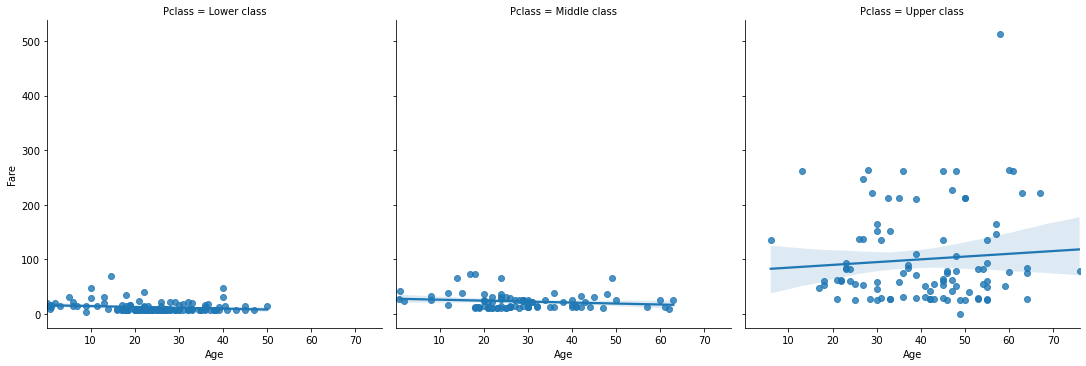

In [28]:
#to compare the fare for each class using lmplot
sns.lmplot(x='Age',y='Fare',col='Pclass',data=df_original)

<AxesSubplot:xlabel='Family', ylabel='count'>

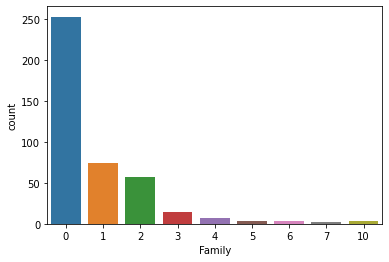

In [29]:
#number of family members for each passenger
sns.countplot(x='Family',data=df_original)

In [31]:
cabin_not_nan= df_original[['Survived','Pclass','Fare','Cabin']]

In [32]:
cabin_not_nan

,Survived,Pclass,Fare,Cabin
0,0,Lower class,7.8292,NaN
1,1,Lower class,7.0000,NaN
2,0,Middle class,9.6875,NaN
3,0,Lower class,8.6625,NaN
4,1,Lower class,12.2875,NaN
...,...,...,...,...
413,0,Lower class,8.0500,NaN
414,1,Upper class,108.9000,C105
415,0,Lower class,7.2500,NaN
416,0,Lower class,8.0500,NaN


In [35]:
cabin_not_nan.dropna()


,Survived,Pclass,Fare,Cabin
12,1,Upper class,82.2667,B45
14,1,Upper class,61.1750,E31
24,1,Upper class,262.3750,B57 B59 B63 B66
26,1,Upper class,61.9792,B36
28,0,Upper class,30.5000,A21
...,...,...,...,...
404,0,Upper class,27.7208,D40
405,0,Middle class,13.8625,D38
407,0,Upper class,211.5000,C80
411,1,Upper class,90.0000,C78


(array([80.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  7.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

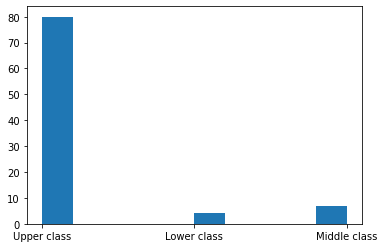

In [36]:
#info available for the cabin numbers that are not nan
plt.hist('Pclass',data=cabin_not_nan)

(array([40.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

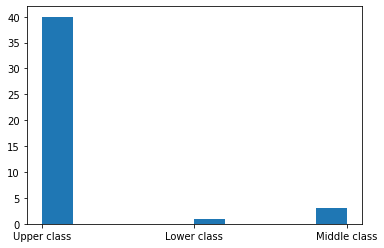

In [38]:
#survived in upper class
plt.hist(cabin_not_nan[cabin_not_nan['Survived']==1]['Pclass'])